Imports

In [219]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Loading

In [220]:
data = pd.read_csv('data.csv')

In [221]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [222]:
data = data.drop(['id', 'Unnamed: 32'], axis=1)

In [223]:
# Convert diagnosis to binary
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})

In [224]:
# Split the data
y = data['diagnosis']
features = data.drop(['diagnosis'], axis=1)

Data Scaling

In [225]:
scaler = StandardScaler()
scaler.fit(features)
X_centered = scaler.transform(features)


# PCA implementation

In [226]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvectors by eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_indices]
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [227]:
my_pca= CustomPCA(n_components=3)
X_pca = my_pca.fit_transform(X_centered)

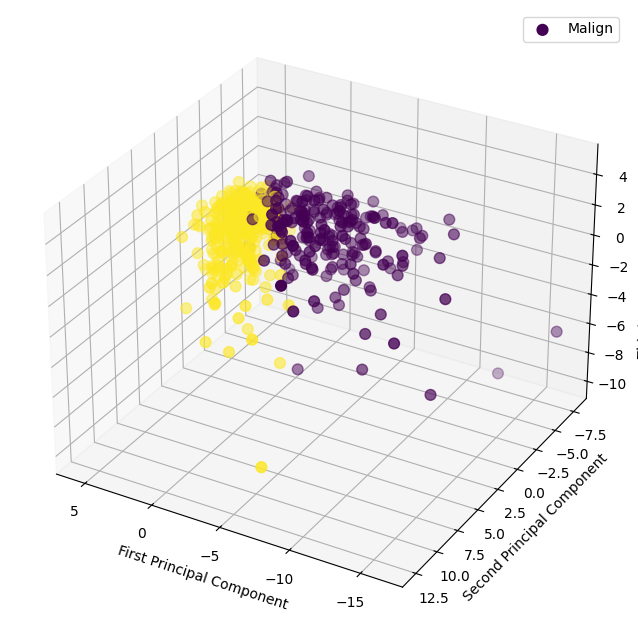

In [228]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=data['diagnosis'], s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

Text(0, 0.5, 'Second Principal Component')

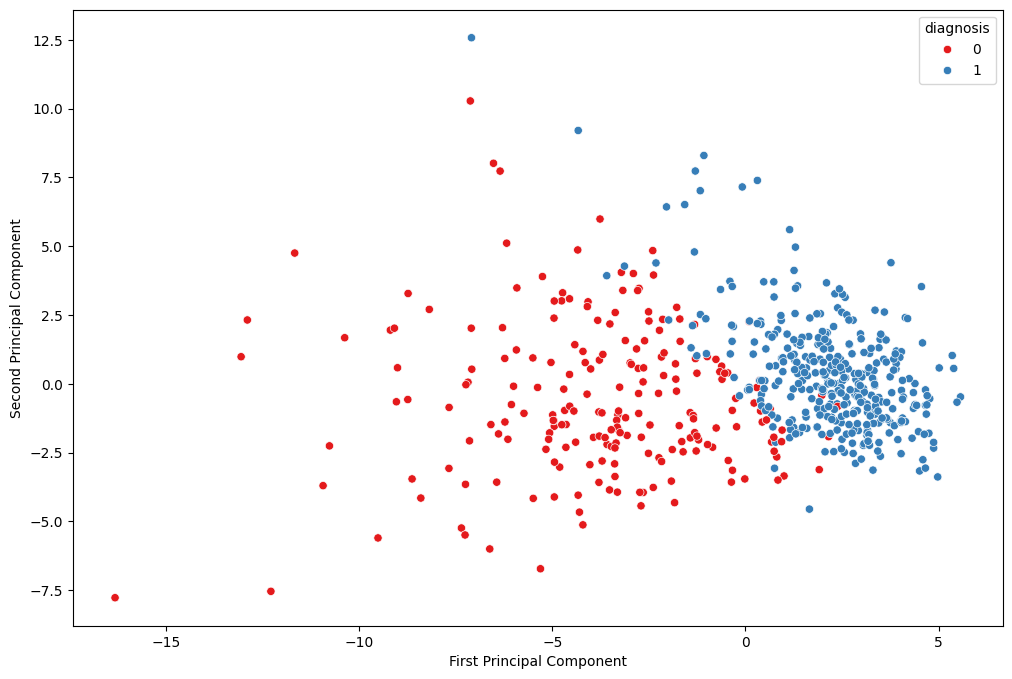

In [229]:


ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=data['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



Text(0, 0.5, 'Third Principal Component')

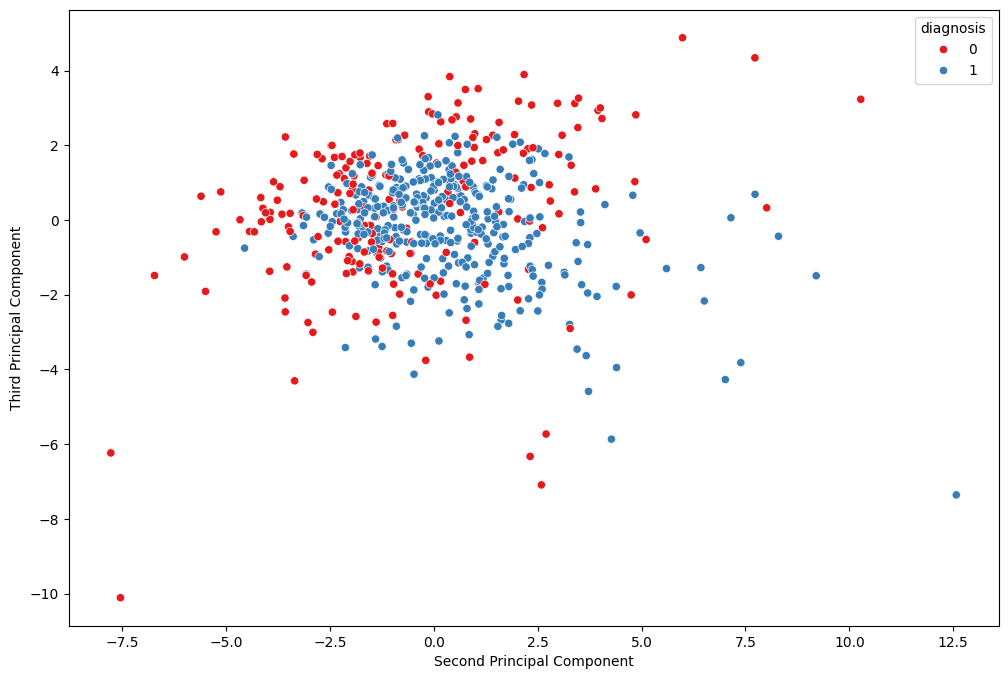

In [230]:


ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=X_pca[:,1],y=X_pca[:,2],hue=data['diagnosis'], palette ='Set1' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')



Text(0, 0.5, 'Third Principal Component')

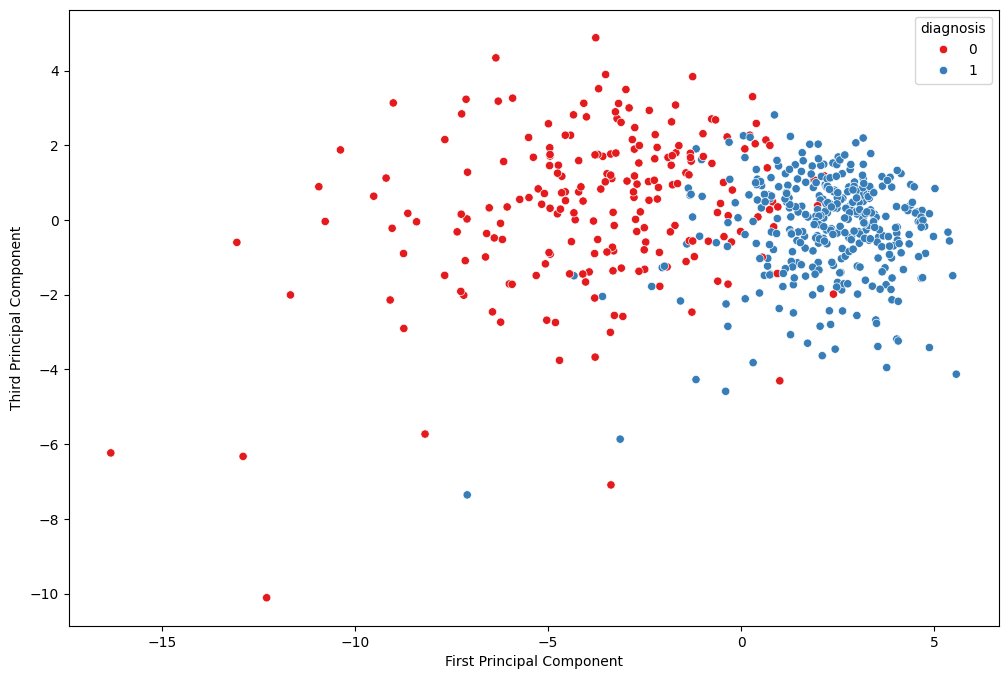

In [231]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,2],hue=data['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')

Comparing with scikit PCA

In [232]:
pca = PCA(n_components=3)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)


In [233]:
X_pca.shape

(569, 3)

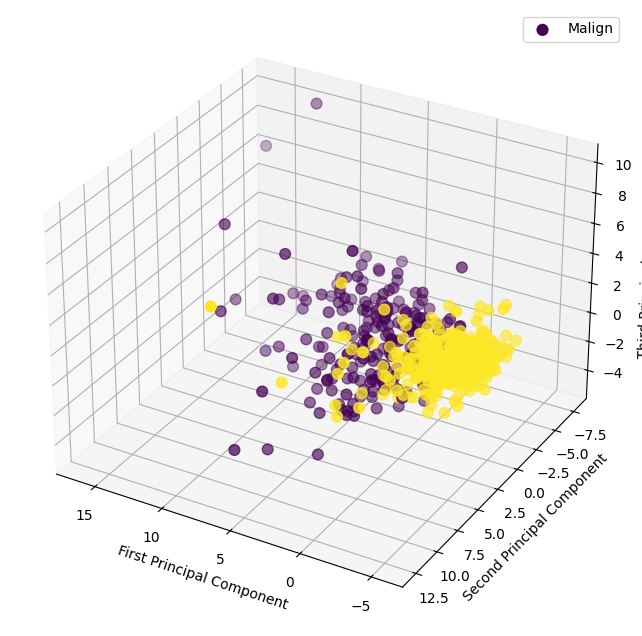

In [234]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2], c=data['diagnosis'], s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

Text(0, 0.5, 'Second Principal Component')

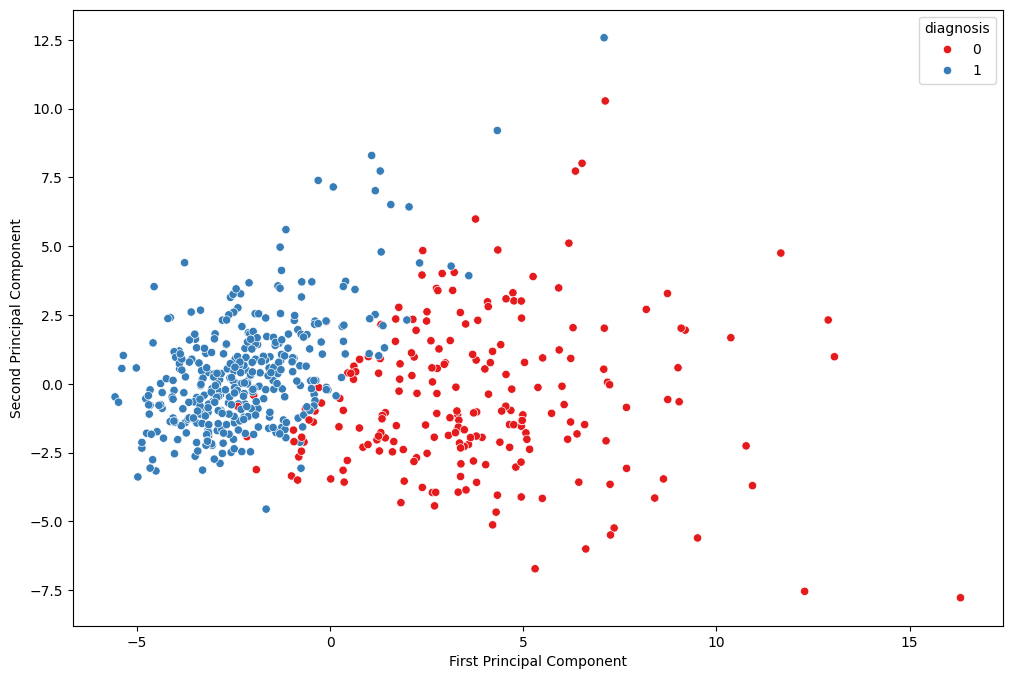

In [235]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x = X_pca[:,0],y= X_pca[:,1],hue=data['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Third Principal Component')

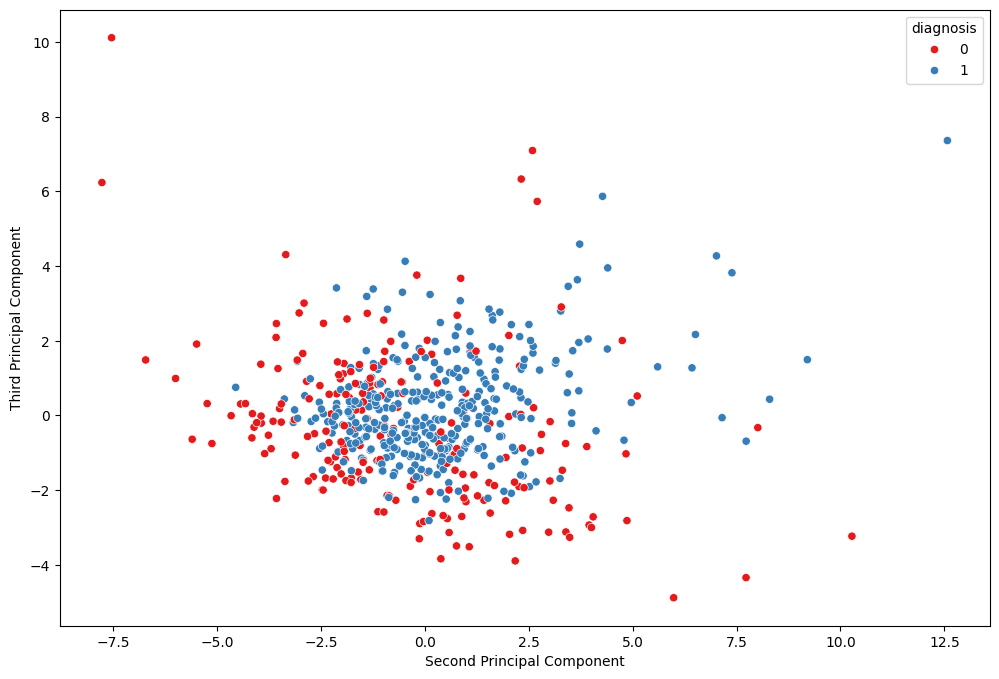

In [236]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x = X_pca[:,1], y= X_pca[:,2],hue=data['diagnosis'], palette ='Set1' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

Text(0, 0.5, 'Third Principal Component')

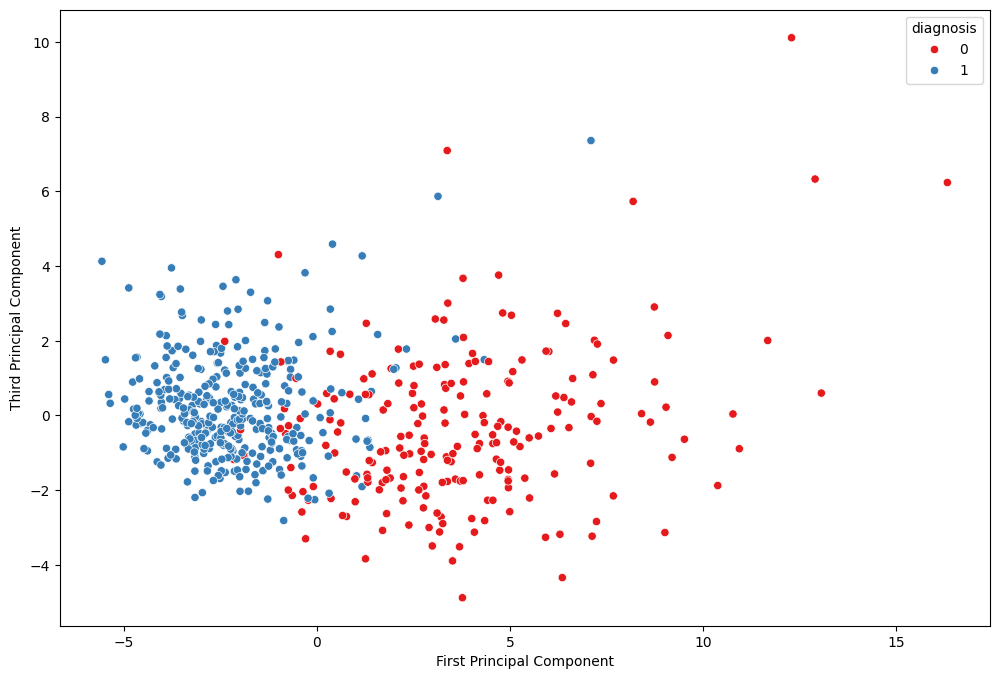

In [237]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x = X_pca[:,0],y= X_pca[:,2],hue=data['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')

# K means Implementation

In [238]:
class KMeansCustom:
    def __init__(self, n_clusters, max_iter=100, tol=0.001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.clusters = None

    def init_centroids(self, X):
        rand_inds = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        self.centroids = X[rand_inds]

    def compute_distances(self, X):
        distances = np.zeros((X.shape[0], self.centroids.shape[0])) # distance matrix
        for i in range(X.shape[0]):
            for j in range(self.centroids.shape[0]):
                distances[i, j] = np.sqrt(np.sum((X[i] - self.centroids[j])**2))  # euclidean distance
        return distances

    def assign_clusters(self, distances):
        self.clusters = np.argmin(distances, axis=1)

    def compute_centroids(self, data):
        n_features = data.shape[1]
        new_centroids = np.zeros((self.n_clusters, n_features))
        for cluster in range(self.n_clusters):
            cluster_points = data[self.clusters == cluster]
            if len(cluster_points) > 0:
                new_centroids[cluster] = cluster_points.mean(axis=0)
        return new_centroids

    def fit(self, data):
        self.init_centroids(data)
        for i in range(self.max_iter):
            distances = self.compute_distances(data)
            self.assign_clusters(distances)
            new_centroids = self.compute_centroids(data)
            centroid_shift = np.linalg.norm(new_centroids - self.centroids, axis=None)
            if centroid_shift < self.tol:
                print(f"Convergence reached at iteration {i + 1}.")
                break
            self.centroids = new_centroids

    def predict(self, data):
        distances = self.compute_distances(data)
        return np.argmin(distances, axis=1)


Experiment 1

In [239]:
def calc_sse(data, clusters, centroids):
    sse = 0
    for i in range(len(data)):
        centroid = centroids[clusters[i]]
        sse += np.sum((data[i] - centroid) ** 2)
    return sse

In [240]:
def calculate_sse_with_pca(data, max_components, max_clusters):
    sse_results = {}

    for n_components in range(1, max_components + 1):
        # Apply PCA
        pca = PCA(n_components=n_components)
        data_transformed = pca.fit_transform(data)

        sse = []
        for k in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(data_transformed)
            sse.append(kmeans.inertia_)

        sse_results[n_components] = sse

    return sse_results

Convergence reached at iteration 22.
Cluster assignments (first 100 samples): [0 0 0 1 0 1 0 1 1 1 2 1 0 2 1 1 2 1 0 2 2 2 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1
 2 2 1 2 1 0 1 2 0 2 1 2 2 2 2 2 0 2 2 0 1 2 2 2 2 1 2 1 1 2 2 1 2 0 1 0 2
 2 0 2 0 0 2 2 1 0 0 2 0 2 0 2 1 2 2 2 2 1 0 2 2 2 1]
Convergence reached at iteration 2.
Convergence reached at iteration 9.
Convergence reached at iteration 24.
Convergence reached at iteration 17.
Convergence reached at iteration 28.
Convergence reached at iteration 31.
Convergence reached at iteration 29.
Convergence reached at iteration 13.
Convergence reached at iteration 16.
Convergence reached at iteration 22.


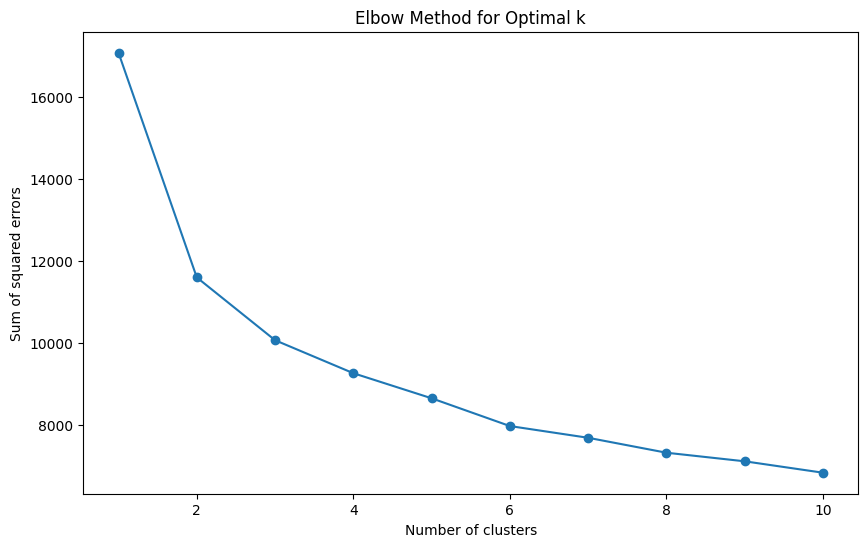

In [241]:
import sklearn.cluster as Kmeans
data = pd.read_csv('data.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})
features = data.drop(['diagnosis'], axis=1)
scaler = StandardScaler()
scaler.fit(features)
X_centered = scaler.transform(features)

# Apply custom KMeans
k = 3
kmeans_custom = KMeansCustom(n_clusters=k)
kmeans_custom.fit(X_centered)
clusters = kmeans_custom.predict(X_centered)
centroids = kmeans_custom.centroids
print("Cluster assignments (first 100 samples):", clusters[:100])

# Add cluster assignments to the original data
data['cluster'] = clusters

sse = []
for k in range(1, 11):
    kmeans_custom = KMeansCustom(n_clusters=k)
    kmeans_custom.fit(X_centered)
    clusters = kmeans_custom.predict(X_centered)
    centroids = kmeans_custom.centroids
    sse.append(calc_sse(X_centered, clusters, centroids))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.title('Elbow Method for Optimal k')
plt.show()



Convergence reached at iteration 16.
Cluster assignments (first 100 samples): [2 0 0 4 0 4 0 4 4 4 3 0 2 0 4 4 0 0 0 3 3 1 4 0 0 2 4 0 0 0 2 4 0 0 0 0 0
 3 3 0 3 1 2 0 3 0 1 4 3 3 3 3 3 0 3 1 0 0 3 1 1 1 4 1 0 0 1 3 4 3 0 4 0 3
 3 0 1 2 2 3 1 4 2 0 1 0 0 0 1 0 3 0 3 3 0 0 1 1 3 0]


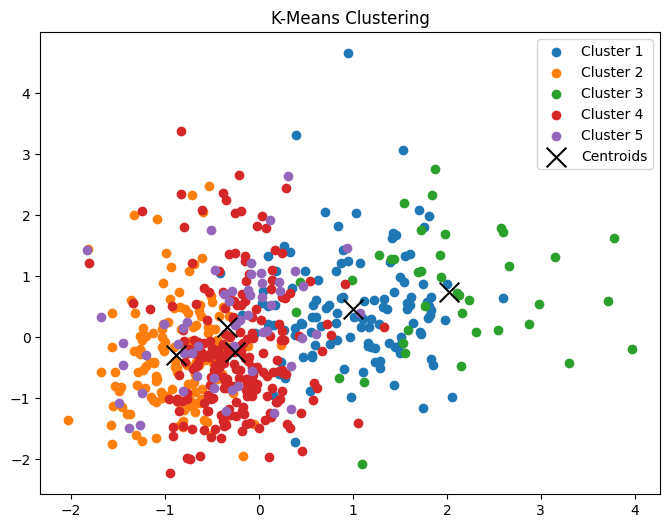

In [242]:
k = 5

kmeans_custom = KMeansCustom(n_clusters=k)
kmeans_custom.fit(X_centered)
clusters = kmeans_custom.predict(X_centered)
centroids = kmeans_custom.centroids
print("Cluster assignments (first 100 samples):", clusters[:100])

# Add cluster assignments to the original data
data['cluster'] = clusters

def plot_clusters(data, clusters, centroids, k):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(data[clusters == i, 0], data[clusters == i, 1], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', label='Centroids', marker='x')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()
plot_clusters(X_centered, clusters, centroids, k)

Experiment 2

Convergence reached at iteration 16.
Cluster assignments (first 100 samples): [2 2 2 1 2 1 2 1 1 1 0 1 2 0 1 1 0 1 2 0 0 0 1 2 2 2 1 2 1 2 2 1 2 2 1 1 1
 0 0 1 0 1 2 1 1 2 0 1 0 0 0 0 0 2 0 0 2 1 0 0 0 0 1 0 1 1 0 0 1 0 2 0 1 0
 0 2 0 2 2 0 0 1 2 2 0 2 0 2 0 1 0 0 0 0 1 2 0 0 0 1]
Sum of Squared Errors (SSE): 187.0384

Custom K-Means Centroids:
[[0.25724828 0.28710408 0.24811606 0.14533507 0.3504499  0.16938359
  0.09500438 0.12511818 0.33460925 0.24360571 0.06453055 0.18689068
  0.05899374 0.02911313 0.17803893 0.12252456 0.05391389 0.17487179
  0.17145216 0.07725531 0.20673403 0.31839935 0.19261204 0.1005868
  0.348234   0.13842304 0.12103526 0.25288623 0.22316342 0.14417805]
 [0.32526386 0.3574317  0.3323279  0.19501861 0.50806252 0.44012996
  0.37366822 0.36000169 0.48993123 0.433365   0.10579241 0.1931563
  0.1053975  0.05340887 0.20003848 0.30184392 0.14418359 0.30358788
  0.20743079 0.17591966 0.30128674 0.43333201 0.30176335 0.1611882
  0.55892267 0.41573429 0.41324179 0.592073

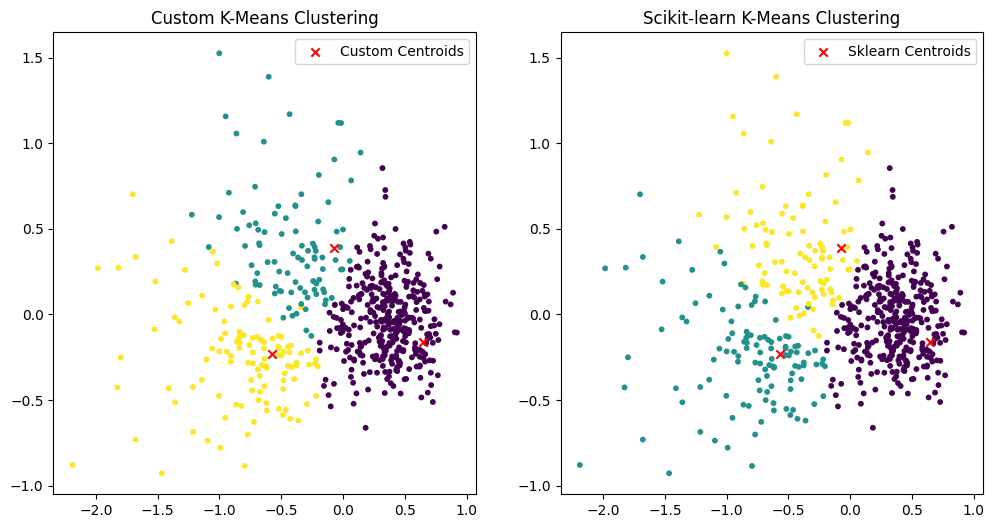

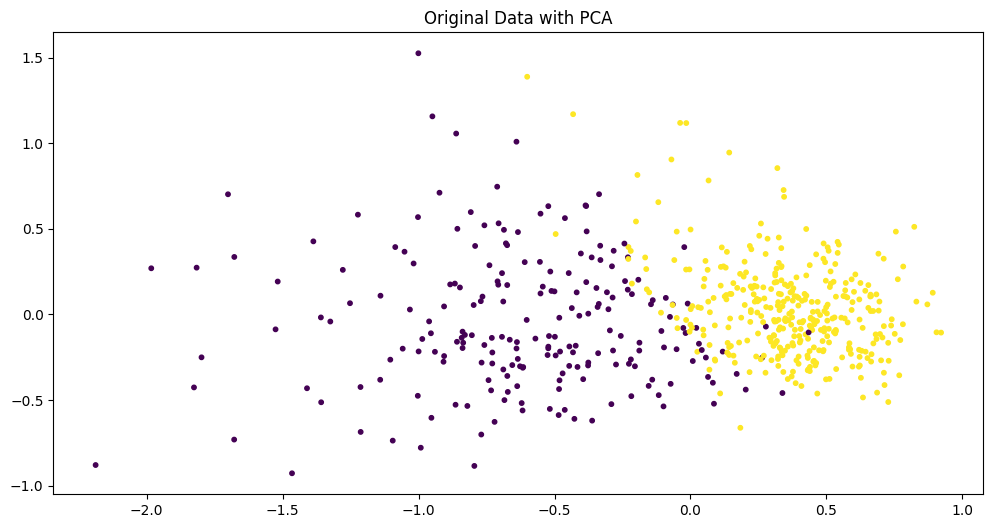

Convergence reached at iteration 2.
Convergence reached at iteration 7.
Convergence reached at iteration 19.
Convergence reached at iteration 26.
Convergence reached at iteration 25.
Convergence reached at iteration 19.
Convergence reached at iteration 29.
Convergence reached at iteration 31.
Convergence reached at iteration 24.
Convergence reached at iteration 36.


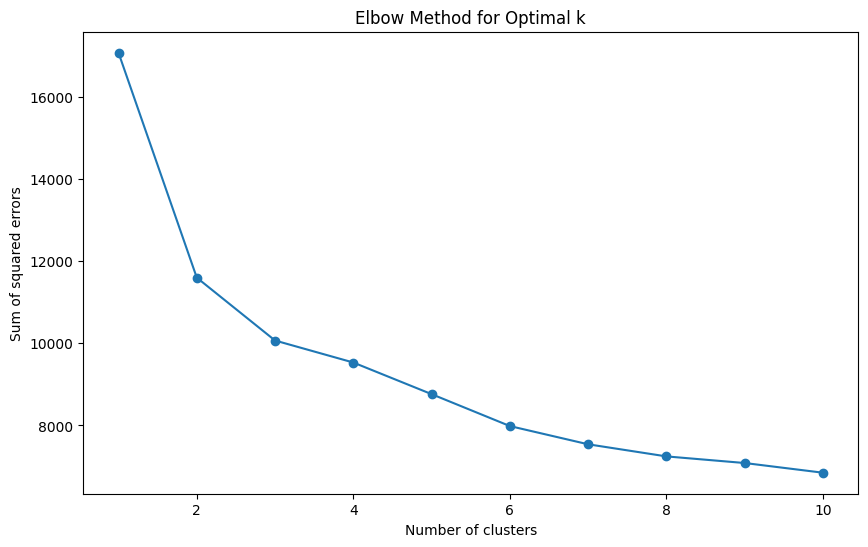

Sum of squared errors for different k values: [np.float64(17069.999999999993), np.float64(11595.461473962348), np.float64(10065.44117873283), np.float64(9529.953685111695), np.float64(8760.288135366218), np.float64(7983.3201597513535), np.float64(7539.7883037652755), np.float64(7245.182241850622), np.float64(7084.059449733738), np.float64(6848.134069872122)]


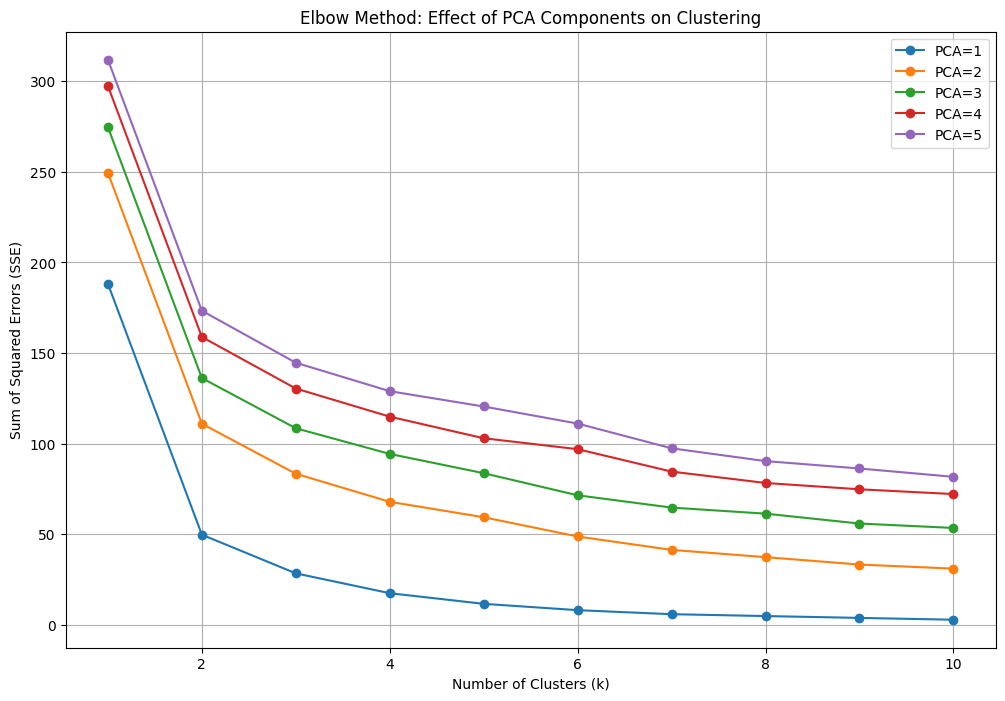

In [243]:
from sklearn.cluster import KMeans

df = pd.read_csv('data.csv')

data = df.iloc[:, 2:-1].to_numpy()
data_n = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0)) # normalize

# Run K-Means


# Run K-Means
k = 3
kmeans_custom = KMeansCustom(n_clusters=k)
kmeans_custom.fit(data_n)
clusters = kmeans_custom.predict(data_n)
centroids = kmeans_custom.centroids
print("Cluster assignments (first 100 samples):", clusters[:100])

# Use custom PCA implementation
pca = CustomPCA(n_components=2)
data_2d = pca.fit_transform(data_n)

def calc_sse(data, clusters, centroids):
    sse = 0
    for i in range(len(data)):
        centroid = centroids[clusters[i]]
        sse += np.sum((data[i] - centroid) ** 2)
    return sse

sse = calc_sse(data_n, clusters, centroids)
print(f"Sum of Squared Errors (SSE): {sse:.4f}")

# Compare results with sklearn KMeans
sklearn_kmeans = KMeans(n_clusters=k, init='random', max_iter=100, tol=0.001, random_state=42)
sklearn_kmeans.fit(data_n)

sklearn_clusters = sklearn_kmeans.labels_
sklearn_centroids = sklearn_kmeans.cluster_centers_

print("\nCustom K-Means Centroids:")
print(centroids)
print("\nScikit-learn K-Means Centroids:")
print(sklearn_centroids)

sklearn_sse = sklearn_kmeans.inertia_
print(f"\nScikit-learn Sum of Squared Errors (SSE): {sklearn_sse:.4f}")


plt.figure(figsize=(12, 6))
centroids= pca.fit_transform(centroids)
# Custom K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='viridis', s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Custom Centroids')
plt.title("Custom K-Means Clustering")
plt.legend()
sklearn_centroids= pca.fit_transform(sklearn_centroids)
# Scikit-learn K-Means plot
plt.subplot(1, 2, 2)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=sklearn_clusters, cmap='viridis', s=10)
plt.scatter(sklearn_centroids[:, 0], sklearn_centroids[:, 1], c='red', marker='x', label='Sklearn Centroids')
plt.title("Scikit-learn K-Means Clustering")
plt.legend()
plt.show()
# Original Data plot
plt.figure(figsize=(12, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df['diagnosis'].map({'M': 0, 'B': 1}), cmap='viridis', s=10)
plt.title("Original Data with PCA")
plt.show()
sse = []
for k in range(1, 11):
    kmeans_custom = KMeansCustom(n_clusters=k)
    kmeans_custom.fit(X_centered)
    clusters = kmeans_custom.predict(X_centered)
    centroids = kmeans_custom.centroids
    sse.append(calc_sse(X_centered, clusters, centroids))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.title('Elbow Method for Optimal k')
plt.show()
print('Sum of squared errors for different k values:', sse)
# Calculate SSE for different combinations
max_components = 5  # Try up to 5 PCA components
max_clusters = 10   # Try up to 10 clusters
sse_results = calculate_sse_with_pca(data_n, max_components, max_clusters)

# Plot elbow curves for different PCA components
plt.figure(figsize=(12, 8))
for n_components, sse in sse_results.items():
    plt.plot(range(1, max_clusters + 1), sse, marker='o', label=f'PCA={n_components}')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method: Effect of PCA Components on Clustering')
plt.legend()
plt.grid(True)
plt.show()

